In [4]:
%matplotlib inline
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [23]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [9]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [10]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [11]:
from citipy import citipy

In [12]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

607

In [25]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [26]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(1)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | pointe michel
Processing Record 2 of Set 1 | blythe
Processing Record 3 of Set 1 | hithadhoo
Processing Record 4 of Set 1 | marsa matruh
Processing Record 5 of Set 1 | cape town
Processing Record 6 of Set 1 | tasiilaq
Processing Record 7 of Set 1 | thompson
Processing Record 8 of Set 1 | busselton
Processing Record 9 of Set 1 | rikitea
Processing Record 10 of Set 1 | saint-augustin
Processing Record 11 of Set 1 | amderma
City not found. Skipping...
Processing Record 12 of Set 1 | saint-pierre
Processing Record 13 of Set 1 | tahoua
Processing Record 14 of Set 1 | tiksi
Processing Record 15 of Set 1 | punta arenas
Processing Record 16 of Set 1 | atuona
Processing Record 17 of Set 1 | qiqihar
Processing Record 18 of Set 1 | aklavik
Processing Record 19 of Set 1 | hilo
Processing Record 20 of Set 1 | belaya gora
Processing Record 21 of Set 1 | fuente de oro
Processing Record 22 of Set 1 | shingu
Proc

City not found. Skipping...
Processing Record 41 of Set 4 | porto novo
Processing Record 42 of Set 4 | baculin
Processing Record 43 of Set 4 | souillac
Processing Record 44 of Set 4 | nelson bay
Processing Record 45 of Set 4 | kasempa
Processing Record 46 of Set 4 | tuktoyaktuk
Processing Record 47 of Set 4 | agadir
Processing Record 48 of Set 4 | touros
Processing Record 49 of Set 4 | mahebourg
Processing Record 50 of Set 4 | lom sak
Processing Record 1 of Set 5 | ust-tsilma
Processing Record 2 of Set 5 | tarudant
City not found. Skipping...
Processing Record 3 of Set 5 | tazovskiy
Processing Record 4 of Set 5 | neiafu
Processing Record 5 of Set 5 | kloulklubed
Processing Record 6 of Set 5 | mahadday weyne
City not found. Skipping...
Processing Record 7 of Set 5 | labuan
Processing Record 8 of Set 5 | herat
Processing Record 9 of Set 5 | ambodifototra
City not found. Skipping...
Processing Record 10 of Set 5 | huilong
Processing Record 11 of Set 5 | kieta
Processing Record 12 of Set 5

Processing Record 23 of Set 8 | novita
Processing Record 24 of Set 8 | parakou
Processing Record 25 of Set 8 | ahipara
Processing Record 26 of Set 8 | kununurra
Processing Record 27 of Set 8 | mahibadhoo
Processing Record 28 of Set 8 | oak ridge
Processing Record 29 of Set 8 | mayya
Processing Record 30 of Set 8 | bani
Processing Record 31 of Set 8 | takoradi
Processing Record 32 of Set 8 | mantua
Processing Record 33 of Set 8 | eyrarbakki
Processing Record 34 of Set 8 | ewa beach
Processing Record 35 of Set 8 | leh
Processing Record 36 of Set 8 | springdale
Processing Record 37 of Set 8 | ercis
Processing Record 38 of Set 8 | konskie
Processing Record 39 of Set 8 | darhan
Processing Record 40 of Set 8 | tianpeng
Processing Record 41 of Set 8 | tumannyy
City not found. Skipping...
Processing Record 42 of Set 8 | benjamin aceval
Processing Record 43 of Set 8 | olga
Processing Record 44 of Set 8 | ambilobe
Processing Record 45 of Set 8 | floro
Processing Record 46 of Set 8 | noshiro
Proc

Processing Record 16 of Set 12 | zhitikara
City not found. Skipping...
Processing Record 17 of Set 12 | sainte-savine
Processing Record 18 of Set 12 | wanxian
Processing Record 19 of Set 12 | whitley bay
Processing Record 20 of Set 12 | amantea
Processing Record 21 of Set 12 | tsihombe
City not found. Skipping...
Processing Record 22 of Set 12 | san-pedro
Processing Record 23 of Set 12 | katherine
Processing Record 24 of Set 12 | araouane
Processing Record 25 of Set 12 | la reforma
Processing Record 26 of Set 12 | chilliwack
Processing Record 27 of Set 12 | buraydah
Processing Record 28 of Set 12 | aksu
Processing Record 29 of Set 12 | hamilton
Processing Record 30 of Set 12 | shache
Processing Record 31 of Set 12 | laiagam
City not found. Skipping...
Processing Record 32 of Set 12 | jiroft
City not found. Skipping...
Processing Record 33 of Set 12 | tucurui
Processing Record 34 of Set 12 | bundaberg
Processing Record 35 of Set 12 | winnemucca
Processing Record 36 of Set 12 | tiarei
Pr

In [27]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Pointe Michel,15.2500,-61.3833,80.89,84,81,26.75,DM,2022-06-29 11:51:54
1,Blythe,33.6103,-114.5964,93.65,17,0,6.91,US,2022-06-29 11:51:54
2,Hithadhoo,-0.6000,73.0833,83.95,73,100,10.38,MV,2022-06-29 11:51:55
3,Marsa Matruh,31.3525,27.2453,82.60,61,40,20.71,EG,2022-06-29 11:51:55
4,Cape Town,-33.9258,18.4232,77.41,33,0,12.66,ZA,2022-06-29 11:51:56
5,Tasiilaq,65.6145,-37.6368,37.67,76,100,4.21,GL,2022-06-29 11:51:56
6,Thompson,55.7435,-97.8558,53.76,62,75,6.91,CA,2022-06-29 11:51:57
7,Busselton,-33.6500,115.3333,51.13,78,0,9.89,AU,2022-06-29 11:51:58
8,Rikitea,-23.1203,-134.9692,71.96,78,95,23.17,PF,2022-06-29 11:51:58
9,Saint-Augustin,51.2260,-58.6502,58.08,74,100,8.72,CA,2022-06-29 11:52:04


In [28]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

In [29]:
city_data_df = city_data_df[new_column_order]
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Pointe Michel,DM,2022-06-29 11:51:54,15.2500,-61.3833,80.89,84,81,26.75
1,Blythe,US,2022-06-29 11:51:54,33.6103,-114.5964,93.65,17,0,6.91
2,Hithadhoo,MV,2022-06-29 11:51:55,-0.6000,73.0833,83.95,73,100,10.38
3,Marsa Matruh,EG,2022-06-29 11:51:55,31.3525,27.2453,82.60,61,40,20.71
4,Cape Town,ZA,2022-06-29 11:51:56,-33.9258,18.4232,77.41,33,0,12.66


In [30]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [5]:
load_data_file = "weather_data/cities.csv"
city_data_df = pd.read_csv(load_data_file)

In [6]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

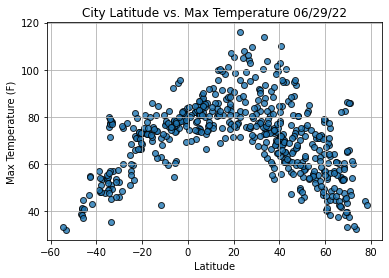

In [7]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

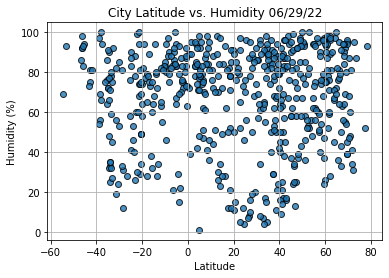

In [8]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

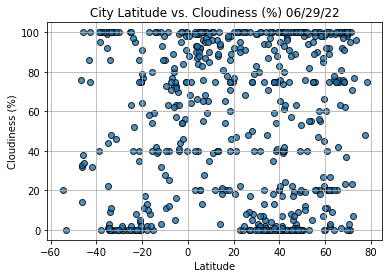

In [9]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

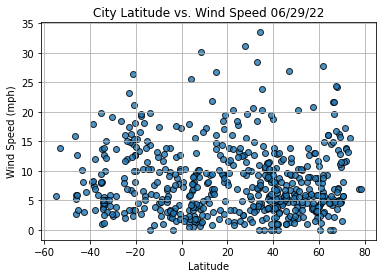

In [10]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [60]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [61]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

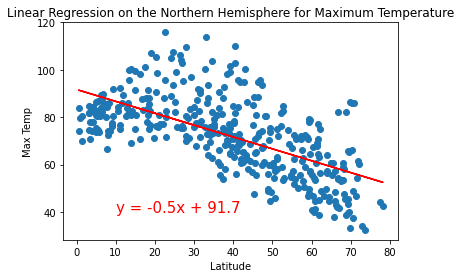

In [62]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Maximum Temperature', 
                       'Max Temp',(10,40))

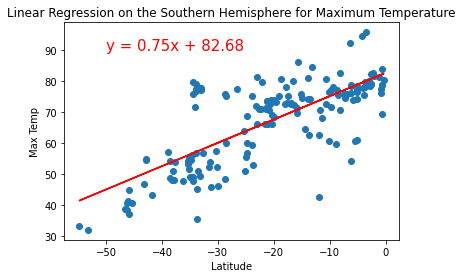

In [63]:
# Linear regression on the Northern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Maximum Temperature',
                       'Max Temp',(-50,90))

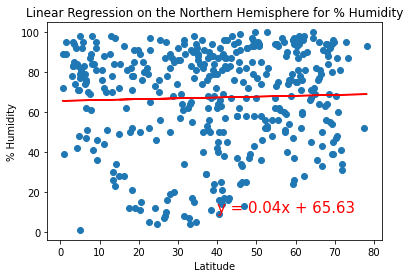

In [64]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Humidity', 
                       '% Humidity',(40,10))

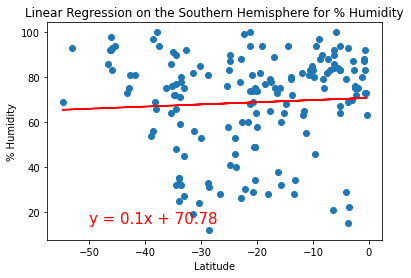

In [65]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Humidity', '% Humidity',(-50,15))

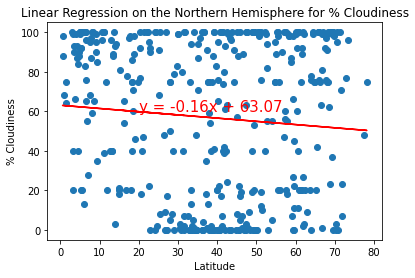

In [40]:
# Linear regression on the Southern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Cloudiness', '% Cloudiness',(20,60))

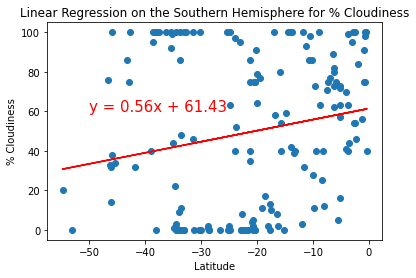

In [42]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Cloudiness', '% Cloudiness',(-50,60))

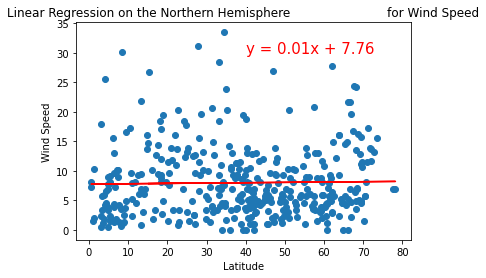

In [46]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,30))

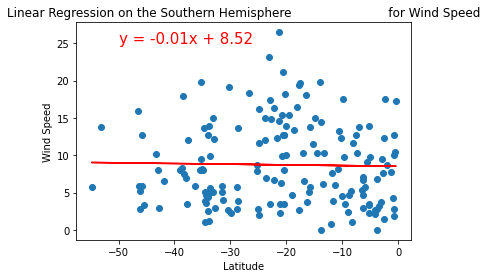

In [47]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,25))